In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import NBA box score data from 2014-2018

df = pd.read_csv(r'C:\Users\JohnSteph\Documents\thinkful\nba-games-stats-from-2014-to-2018\nba.games.stats.csv')

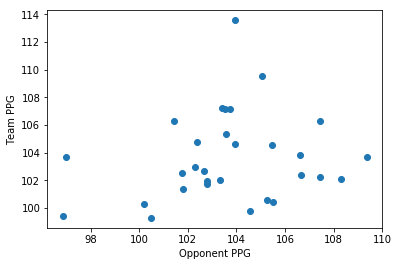

In [3]:
# First, start with something simple - let's see what happens when we plot every team's average score vs. their opponent's average score over those years

plt.scatter(x = df.groupby('Team')['OpponentPoints'].mean(), y = df.groupby('Team')['TeamPoints'].mean())
plt.xlabel('Opponent PPG')
plt.ylabel('Team PPG')
plt.show()

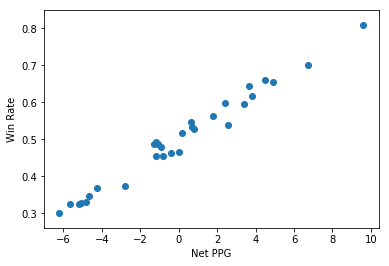

In [4]:
# Not particularly useful! Let's try going further - for each team, calculate their net PPG, and plot their win% vs that value.

net_ppg = df.groupby('Team')['TeamPoints'].mean() - df.groupby('Team')['OpponentPoints'].mean()
wins = df[df['WINorLOSS'].str.contains("W")].groupby('Team').size()
losses = df[df['WINorLOSS'].str.contains("L")].groupby('Team').size()
win_rate = wins / (wins + losses)
plt.scatter(x = net_ppg, y = win_rate)
plt.xlabel('Net PPG')
plt.ylabel('Win Rate')
plt.show()

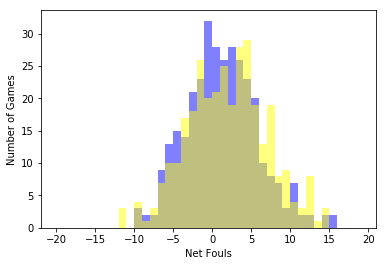

In [5]:
# Now we're seeing something! Clearly there is a very strong correlation between Net PPG and Win%.
# What factors could be influencing this? Let's compare the best and worst teams over this time period.
# Start with something easy - how many net fouls do they have each game? Better teams should commit fewer fouls and be fouled more frequently...

gsw = df.loc[df['Team'] == 'GSW']
lal = df.loc[df['Team'] == 'LAL']
net_fouls_gsw = gsw['TotalFouls'] - gsw['Opp.TotalFouls']
net_fouls_lal = lal['TotalFouls'] - lal['Opp.TotalFouls']
plt.hist(net_fouls_gsw, color='blue', bins=np.arange(-20, 20), alpha=.5)
plt.hist(net_fouls_lal, color='yellow', bins=np.arange(-20, 20), alpha=.5)
plt.xlabel('Net Fouls')
plt.ylabel('Number of Games')
plt.show()

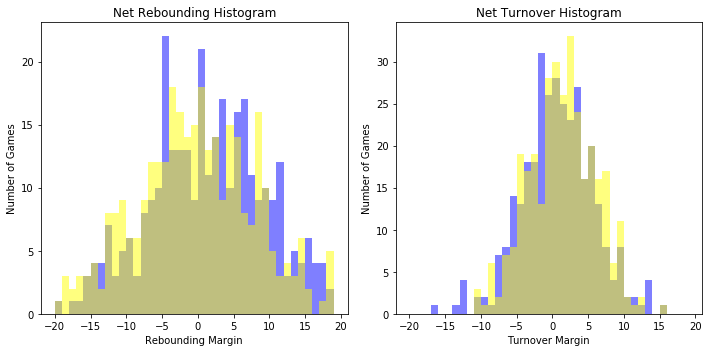

In [6]:
# Bingo! GSW's net fouls are generally fewer than LAL's. Let's look at a few other basic stats and see how those compare...

net_rebounds_gsw = gsw['TotalRebounds'] - gsw['Opp.TotalRebounds']
net_rebounds_lal = lal['TotalRebounds'] - lal['Opp.TotalRebounds']
net_turnovers_gsw = gsw['Turnovers'] - gsw['Opp.Turnovers']
net_turnovers_lal = lal['Turnovers'] - lal['Opp.Turnovers']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(net_rebounds_gsw, color='blue', bins=np.arange(-20, 20), alpha=.5)
plt.hist(net_rebounds_lal, color='yellow', bins=np.arange(-20, 20), alpha=.5)
plt.xlabel('Rebounding Margin')
plt.ylabel('Number of Games')
plt.title('Net Rebounding Histogram')

plt.subplot(1, 2, 2)
plt.hist(net_turnovers_gsw, color='blue', bins=np.arange(-20, 20), alpha=.5)
plt.hist(net_turnovers_lal, color='yellow', bins=np.arange(-20, 20), alpha=.5)
plt.xlabel('Turnover Margin')
plt.ylabel('Number of Games')
plt.title('Net Turnover Histogram')

plt.tight_layout()
plt.show()

In [7]:
# Well, it turns out that the Warriors commit fewer fouls and turnovers than their opponents, while collecting more rebounds. Relative to the Lakers, they are outperforming them in all aspects analyzed in this small set!